Verificación de valores nulos:
text     0
label    0
dtype: int64

Verificación de duplicados:
Número de duplicados: 0


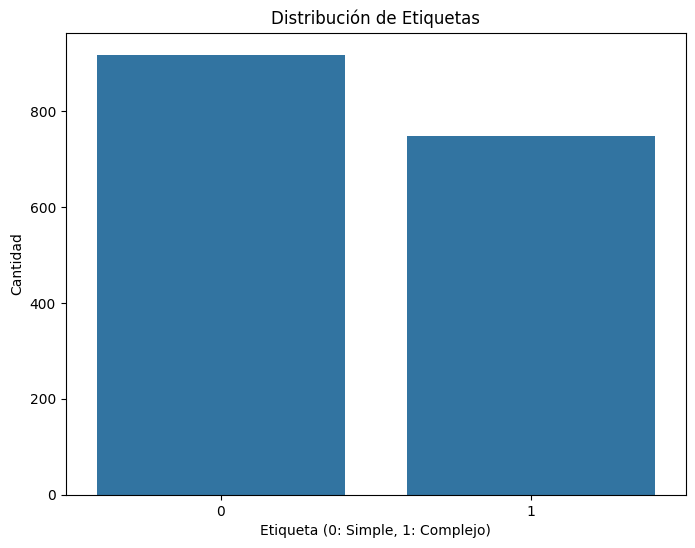


Longitudes promedio por etiqueta:
       Promedio Palabras  Promedio Caracteres
label                                        
0             238.005447          1535.551198
1             229.070856          1579.918449


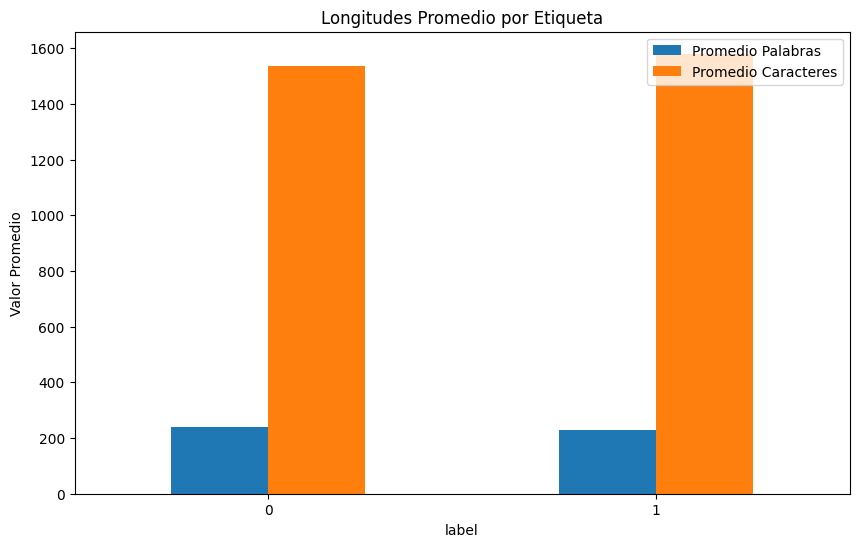

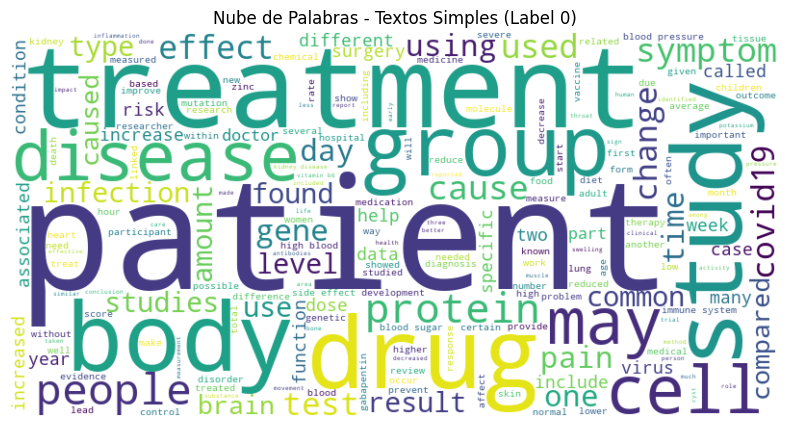

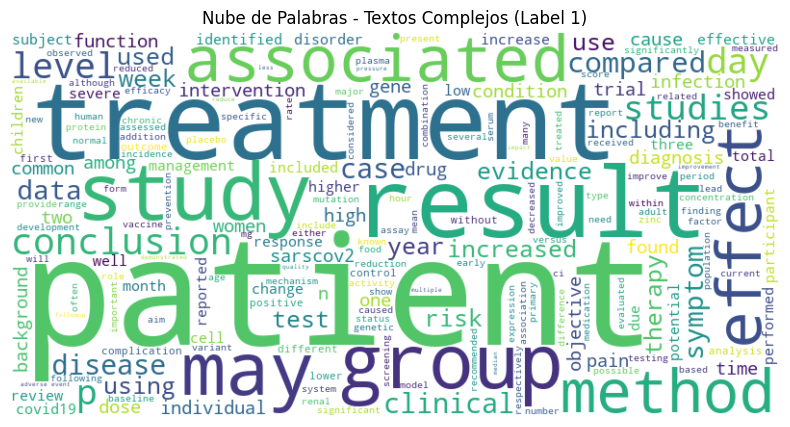

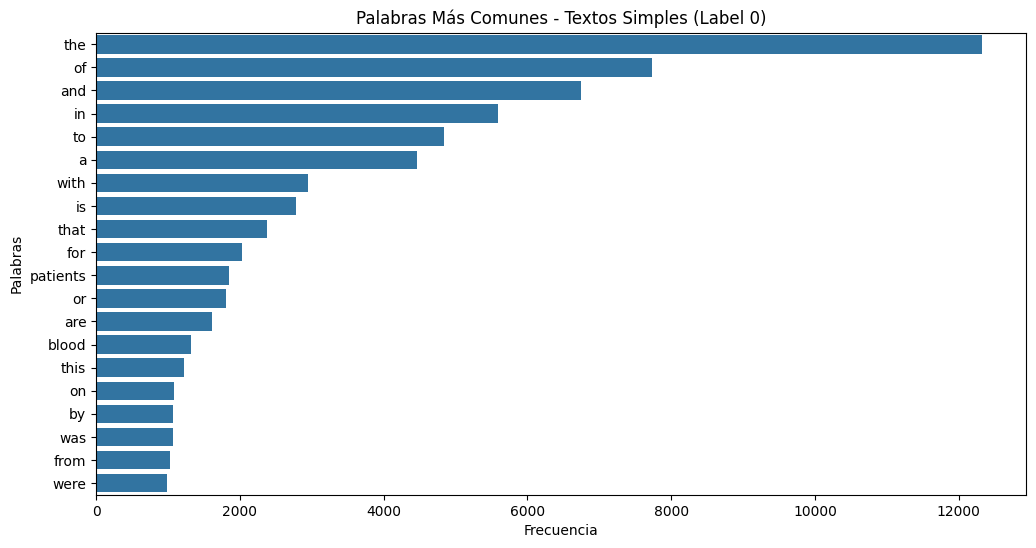

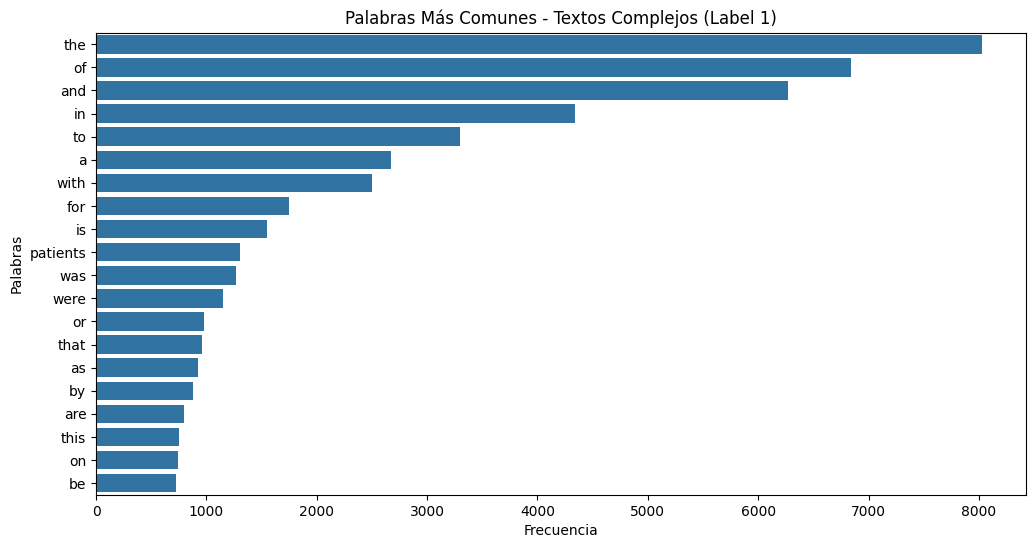


Palabras únicas más frecuentes en Textos Simples (Label 0):
[('looked', 70), ('breathingrelated', 61), ('got', 60), ('pills', 53), ('look', 39), ('infectionfighting', 38), ('heartrelated', 36), ('bedsore', 36), ('beat', 32), ('underactive', 30), ('fullbody', 29), ('creation', 28), ('tubes', 28), ('rehab', 28), ('happen', 27), ('xrays', 27), ('raas', 26), ('carb', 26), ('brainrelated', 25), ('checked', 25)]

Palabras únicas más frecuentes en Textos Complejos (Label 1):
[('0001', 61), ('001', 34), ('hr', 31), ('heterologous', 31), ('homologous', 29), ('tka', 29), ('etiology', 27), ('monotherapy', 26), ('presentation', 25), ('manifestations', 24), ('nbs', 24), ('placebocontrolled', 23), ('morbidity', 23), ('metaanalysis', 23), ('iqr', 22), ('p0001', 21), ('snps', 20), ('pharmacological', 19), ('proliferation', 19), ('hence', 19)]


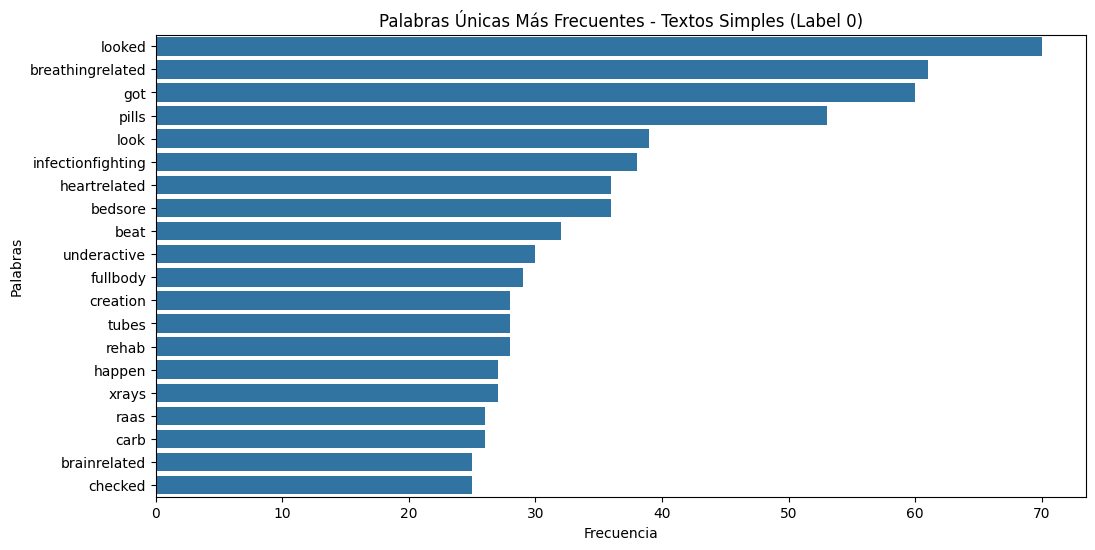

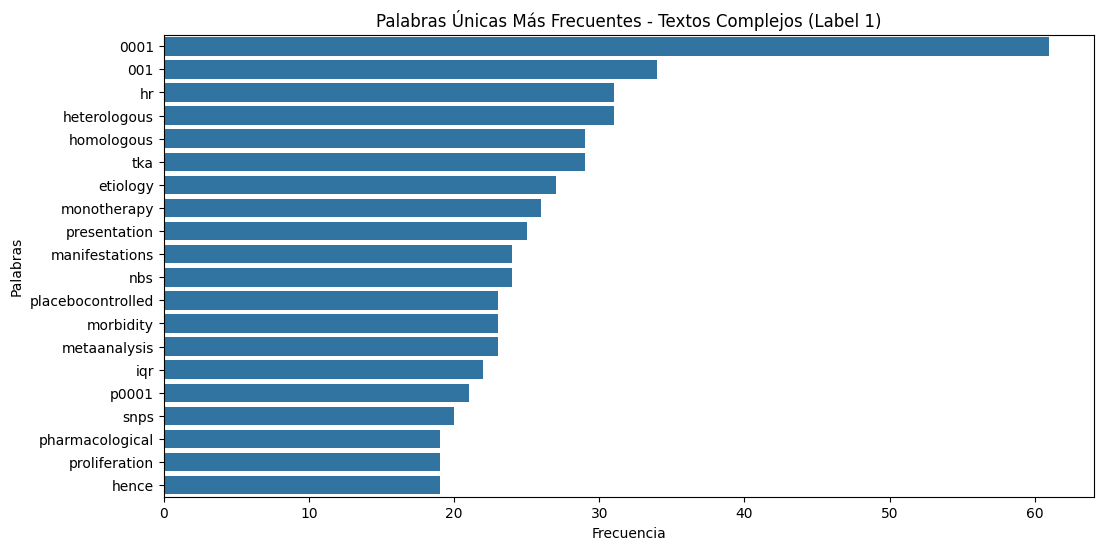

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import string
import re

# Function to clean and tokenize text
def clean_tokenize(text):
    text = text.lower()
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    tokens = text.split()
    return tokens

# Load the dataset
df = pd.read_csv('dataset_binario.csv')

# 1. Verificación de valores nulos y duplicados
print("Verificación de valores nulos:")
print(df.isnull().sum())
print("\nVerificación de duplicados:")
print(f"Número de duplicados: {df.duplicated().sum()}")

# Eliminar duplicados si existen
df = df.drop_duplicates()

# 2. Distribución de etiquetas (gráfico de barras)
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=df)
plt.title('Distribución de Etiquetas')
plt.xlabel('Etiqueta (0: Simple, 1: Complejo)')
plt.ylabel('Cantidad')
plt.show()

# 3. Longitud promedio de los textos (en palabras y caracteres) por etiqueta
df['word_count'] = df['text'].apply(lambda x: len(x.split()))
df['char_count'] = df['text'].apply(len)

avg_lengths = df.groupby('label').agg({
    'word_count': 'mean',
    'char_count': 'mean'
}).rename(columns={'word_count': 'Promedio Palabras', 'char_count': 'Promedio Caracteres'})

print("\nLongitudes promedio por etiqueta:")
print(avg_lengths)

# Visualización de longitudes promedio
avg_lengths.plot(kind='bar', figsize=(10, 6))
plt.title('Longitudes Promedio por Etiqueta')
plt.ylabel('Valor Promedio')
plt.xticks(rotation=0)
plt.show()

# Separar DataFrames por etiqueta
df_simple = df[df['label'] == 0]
df_complex = df[df['label'] == 1]

# Obtener todos los tokens por categoría
tokens_simple = [token for text in df_simple['text'] for token in clean_tokenize(text)]
tokens_complex = [token for text in df_complex['text'] for token in clean_tokenize(text)]

# 4. Análisis de la frecuencia de palabras (nubes de palabras y gráficos de barras)
# Nubes de palabras
def generate_wordcloud(tokens, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(tokens))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

generate_wordcloud(tokens_simple, 'Nube de Palabras - Textos Simples (Label 0)')
generate_wordcloud(tokens_complex, 'Nube de Palabras - Textos Complejos (Label 1)')

# Gráficos de barras para palabras más comunes
def plot_top_words(tokens, title, n=20):
    counter = Counter(tokens)
    most_common = counter.most_common(n)
    words, counts = zip(*most_common)
    plt.figure(figsize=(12, 6))
    sns.barplot(x=list(counts), y=list(words))
    plt.title(title)
    plt.xlabel('Frecuencia')
    plt.ylabel('Palabras')
    plt.show()

plot_top_words(tokens_simple, 'Palabras Más Comunes - Textos Simples (Label 0)')
plot_top_words(tokens_complex, 'Palabras Más Comunes - Textos Complejos (Label 1)')

# 5. Identificación de palabras únicas más frecuentes en cada categoría
# Palabras únicas en simple (no en complex)
unique_simple = set(tokens_simple) - set(tokens_complex)
freq_unique_simple = Counter(token for token in tokens_simple if token in unique_simple).most_common(20)

# Palabras únicas en complex (no en simple)
unique_complex = set(tokens_complex) - set(tokens_simple)
freq_unique_complex = Counter(token for token in tokens_complex if token in unique_complex).most_common(20)

print("\nPalabras únicas más frecuentes en Textos Simples (Label 0):")
print(freq_unique_simple)

print("\nPalabras únicas más frecuentes en Textos Complejos (Label 1):")
print(freq_unique_complex)

# Visualización de palabras únicas
def plot_unique_words(unique_freq, title):
    if unique_freq:
        words, counts = zip(*unique_freq)
        plt.figure(figsize=(12, 6))
        sns.barplot(x=list(counts), y=list(words))
        plt.title(title)
        plt.xlabel('Frecuencia')
        plt.ylabel('Palabras')
        plt.show()

plot_unique_words(freq_unique_simple, 'Palabras Únicas Más Frecuentes - Textos Simples (Label 0)')
plot_unique_words(freq_unique_complex, 'Palabras Únicas Más Frecuentes - Textos Complejos (Label 1)')